# California House Price Prediction

## Install packages

In [46]:
#for machine learning
%pip install -U scikit-learn 

#for dataframes
%pip install -U pandas

#for plots
%pip install -U matplotlib seaborn

#for neural netowkrs
%pip install -U tensorflow

%pip install -U numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Home

## Import the data

In [39]:
import pandas as pd

In [14]:
from sklearn.datasets import fetch_california_housing
features, target = fetch_california_housing(as_frame=True, return_X_y=True)

Explore the features and target

In [15]:
features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## Exploratory plots

Using *matplotlib* package (similar to R's basic *plots*)

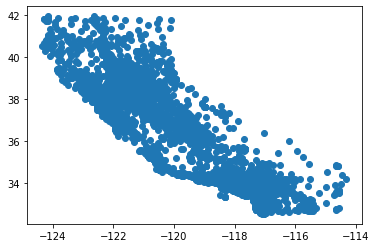

In [20]:
import matplotlib.pyplot as plt
plt.scatter(features["Longitude"], features["Latitude"])

Using Python's *seaborn* package (similar to R's *ggplot2*)

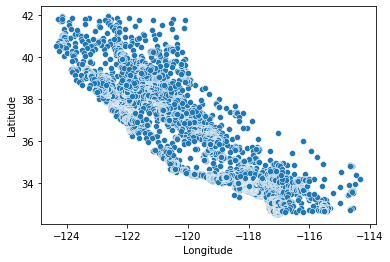

In [19]:
import seaborn as sns
sns.scatterplot(x="Longitude", y="Latitude", data=features);

## Features

In [ ]:
features.columns

In [ ]:
NUM_FEATURES = len(features.columns)
NUM_FEATURES

In [23]:
NUM_FEATURES = features.shape[1]
features.shape

(20640, 8)

## Split into training and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(features, target, random_state=42)

The training set

In [ ]:
X_train

## Simple Baseline Model - Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train);

Coefficients of linear regression can be found by

In [28]:
print(lr.coef_)

[ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]


Make predictions

In [30]:
X_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69


In [31]:
y_pred = lr.predict(X_train.head(3))
y_pred

array([2.35870897, 3.14117532, 2.2227708 ])

In [32]:
# manual prediction using formula
prediction = lr.intercept_
for w_i, x_i in zip(lr.coef_, X_train.iloc[0]):
    prediction += w_i * x_i
prediction

2.358708970668431

Plot predictions

In [34]:
#function used to add diagonal lines to plots
def add_diagonal_line():
    xl = plt.xlim()
    yl = plt.ylim()
    shortestSide = min(xl[1], yl[1])
    plt.plot([0, shortestSide], [0, shortestSide], color="black", linestyle="--")

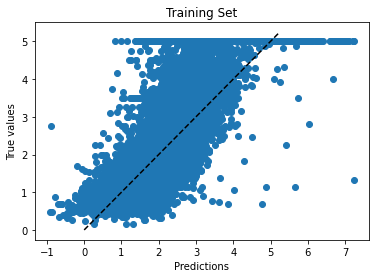

In [36]:
#for training set
y_pred = lr.predict(X_train)
plt.scatter(y_pred, y_train)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Training Set")
add_diagonal_line()

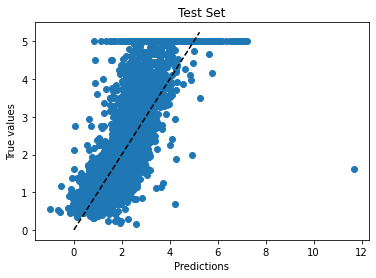

In [37]:
#for test set
y_pred = lr.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

Calculate mean squared error

In [40]:
# manually 
y_pred = lr.predict(X_train)
df = pd.DataFrame({"Predictions": y_pred, "True values": y_train})
df["Squared Error"] = (df["Predictions"] - df["True values"])**2
df.head(4)

,Predictions,True values,Squared Error
8158,2.358709,2.285,0.005433
18368,3.141175,2.799,0.117084
19197,2.222771,1.830,0.154269
3746,3.179989,4.658,2.184517


In [41]:
#manually 
df["Squared Error"].mean()\

0.5205522163645129

In [43]:
#using sklearn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred)

0.5205522163645129

In [44]:
#store results in dictionary
mseLRTrain = mean_squared_error(y_train, lr.predict(X_train))
mseLRTest = mean_squared_error(y_test, lr.predict(X_test))

mseTrain = {"Linear Regression": mseLRTrain}
mseTest = {"Linear Regression": mseLRTest}

{'Linear Regression': 0.5205522163645129}

## Basic Neural Network

Create a Keras ANN model

In [50]:
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#set seed to control randomness since model is initialised randomly
set_seed(123) 

#create model
model = Sequential([
    #hidden layer with 30 neurons
    Dense(30, input_dim=NUM_FEATURES, activation="relu"),
    
    #output layer
    Dense(1)
])

Inspect the model

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                270       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [51]:
model.compile("adam", "mse")
%time hist = model.fit(X_train, y_train, epochs=5, verbose=False)
hist.history["loss"]

CPU times: user 1.95 s, sys: 184 ms, total: 2.13 s
Wall time: 1.72 s


[1640.6533203125,
 4.113470077514648,
 1.8220038414001465,
 1.1254565715789795,
 0.8774554133415222]

Make predictions

162/162 [==============================] - 0s 734us/step


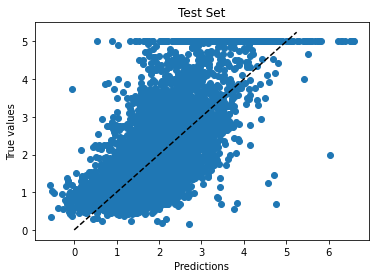

In [52]:
#for test set
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

Assess the model

In [54]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

#store results
mseTrain["Basic ANN"] = mean_squared_error(y_train, model.predict(X_train))
mseTest["Basic ANN"] = mean_squared_error(y_test, model.predict(X_test))

162/162 [==============================] - 0s 582us/step


## Try running model for longer (can improve but may overfit)

In [56]:
set_seed(123)

model = Sequential([
    Dense(30, activation="relu"),
    Dense(1)
])

model.compile("adam", "mse")

%time hist = model.fit(X_train, y_train, \
    epochs=100, verbose=False)

CPU times: user 34.1 s, sys: 3.1 s, total: 37.2 s
Wall time: 28.8 s


Loss curve

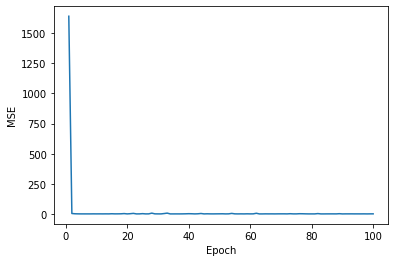

In [57]:
plt.plot(range(1, 101), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

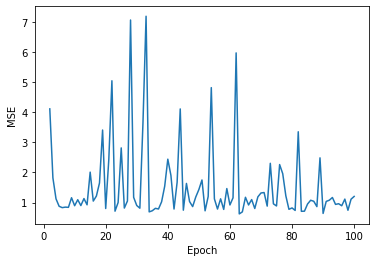

In [58]:
plt.plot(range(2, 101), hist.history["loss"][1:])
plt.xlabel("Epoch")
plt.ylabel("MSE");

Make predictions

In [60]:
y_pred = model.predict(X_test)
print(f"Min prediction: {y_pred.min():.2f}")
print(f"Max prediction: {y_pred.max():.2f}")

162/162 [==============================] - 0s 1ms/step
Min prediction: 0.21
Max prediction: 11.56


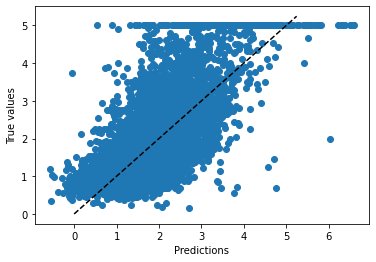

In [59]:
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
add_diagonal_line()

Model Assessment

In [61]:
mseTrain["Long run ANN"] = mean_squared_error(y_train, model.predict(X_train))
mseTest["Long run ANN"] = mean_squared_error(y_test, model.predict(X_test))

162/162 [==============================] - 0s 795us/step


## Force positive outputs (ReLU)

In [62]:
set_seed(123)

model = Sequential([
    Dense(30, activation="relu"),
    Dense(1, activation="relu")
])

model.compile("adam", "mse")

%time hist = model.fit(X_train, y_train, epochs=100, \
    verbose=False)

import numpy as np
losses = np.round(hist.history["loss"], 2)
print(losses[:5], "...", losses[-5:])

CPU times: user 36.4 s, sys: 3.51 s, total: 39.9 s
Wall time: 31.5 s
[1607.21    5.62    5.62    5.62    5.62] ... [5.62 5.62 5.62 5.62 5.62]


162/162 [==============================] - 0s 895us/step


Text(0.5, 1.0, 'Test Set - values are all 0 (no good!)')

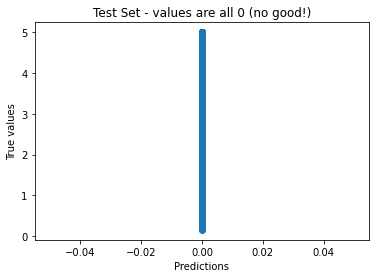

In [65]:
#for test set
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set - values are all 0 (no good!)")

Force positive outputs $(e^x)$

In [ ]:
set_seed(123)

model = Sequential([
    Dense(30, activation="relu"),
    Dense(1, activation="exponential")
])

model.compile("adam", "mse")

%time hist = model.fit(X_train, y_train, epochs=5, verbose=False)

losses = hist.history["loss"]
print(losses)

#all nan --> no good, data needs to be pre-processed

## Pre-processing

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

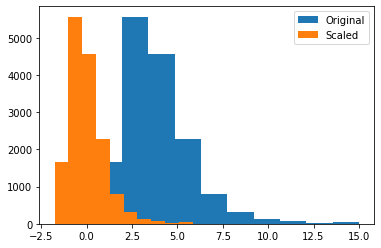

In [70]:
plt.hist(X_train.iloc[:,0])
plt.hist(X_train_sc[:,0])
plt.legend([
    "Original",
    "Scaled"
]);

## $(e^x)$ activation model with scaled inputs

In [71]:
set_seed(123)

model = Sequential([
    Dense(30, activation="relu"),
    Dense(1, activation="exponential")
])

model.compile("adam", "mse")

%time hist = model.fit( \
    X_train_sc, \
    y_train, \
    epochs=100, \
    verbose=False)

CPU times: user 39.7 s, sys: 4.02 s, total: 43.7 s
Wall time: 34.2 s


Loss curve

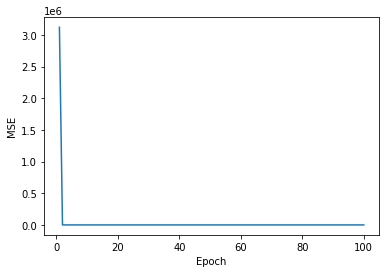

In [73]:
plt.plot(range(1, 101), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

Make predictions

In [74]:
y_pred = model.predict(X_test_sc)
print(f"Min prediction: {y_pred.min():.2f}")
print(f"Max prediction: {y_pred.max():.2f}")

162/162 [==============================] - 0s 830us/step
Min prediction: 0.06
Max prediction: 6.27


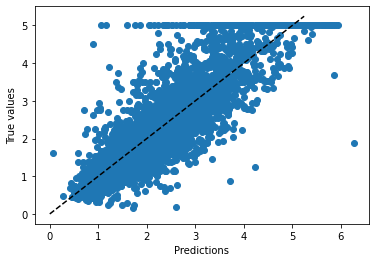

In [75]:
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
add_diagonal_line()

Model Assessment

In [76]:
mseTrain["Exp ANN"] = mean_squared_error(y_train, model.predict(X_train_sc))
mseTest["Exp ANN"] = mean_squared_error(y_test, model.predict(X_test_sc))

162/162 [==============================] - 0s 601us/step


## Comparing MSE

In sample

In [77]:
trainResults = pd.DataFrame({
    "Model": mseTrain.keys(), "MSE": mseTrain.values()
})
trainResults.sort_values("MSE", ascending=False)

,Model,MSE
1,Basic ANN,0.821398
2,Long run ANN,0.648364
0,Linear Regression,0.520552
3,Exp ANN,0.305920


Out sample

In [78]:
testResults = pd.DataFrame({
    "Model": mseTest.keys(), "MSE": mseTest.values()
})
testResults.sort_values("MSE", ascending=False)

,Model,MSE
1,Basic ANN,0.796366
2,Long run ANN,0.628553
0,Linear Regression,0.541129
3,Exp ANN,0.317086
